In [1]:
# imports
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
from numpy import linalg as LA
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean


Populating the interactive namespace from numpy and matplotlib


In [2]:
def dist(img1, img2):
    res = numpy.linalg.norm(img1 - img2, ord = 1)
    return res

In [3]:
#initialization
def load_pic():
    class_count = 40
    image_count = 10
    imgs = []
    for i in range(class_count):
        imgs.append([])
        for j in range(image_count):
            address = "data/s" + str(i+1) + "/" + str(j+1) + ".pgm"
            imgs[i].append(mpimg.imread(address))
    return imgs

In [4]:
#set test, train

def test_train(imgs, count):
    train = []
    test = []
    for i in imgs:
        train.append(i[:count])
        test.append(i[count:])
    return test, train

In [5]:
def scale(img, mult):
    res = []
    h = len(img)
    w = len(img[0])
    h_count = int(h/mult)
    w_count = int(w/mult)
    for i in range(h_count):
        for j in range (int(w_count)):
            res.append(0)
            value = 0
            for q in range(mult):
                for p in range(mult):
                    value += img[i*mult+q][j*mult+p];
            value = value / mult*mult;
            res.append(value)
    
    for i in range(w_count*h_count):
        res[i] = res[i]/mult/mult
        
    return res

In [39]:
def scale(img, mult):
#     res = resize(img, (w_count, h_count)).flatten().astype(int)
    
    res = rescale(img, 1 / mult, anti_aliasing=False).flatten() * 200
        
    return res.astype(int)

def scaleXY(img, size_X, size_Y):
    res = resize(img, (size_X, size_Y)).flatten().astype(int)
        
    return res

In [7]:
def random_list(count,img):
    h = len(img)
    w = len(img[0])
    res = []
    for i in range(count):
        r = int(random.random()*(h*w-1))
        elem = []
        elem.append(int(r/w))
        elem.append(r%w)
        res.append(elem)
    return np.array(res)

In [8]:
def random_img(img, rand_list):
    res = []
    for i in rand_list:
        res.append(img[i[0]][i[1]])
    return np.array(res)

In [9]:
def fft(img, size):
    res = []
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    for i in range(int(len(fshift)/2-size[0]), int(len(fshift)/2+size[0])):
        for j in range(int(len(fshift[0])/2-size[1]), int(len(fshift[0])/2+size[1])):
            res.append(fshift[i][j])
    return res;

In [10]:
def dist_complex(img1, img2):
    res = 0
    for i in range(len(img1)):
        res += abs(img1[i] - img2[i])
    return res;

In [11]:
# def dct():
#     
def dct2(img2, size):
    img = np.array(img2)
    m = dct(dct(img.T, norm='ortho').T, norm='ortho')
    res = []
    for i in range(size[0]):
        for j in range(size[1]):
            res.append(m[i][j])
    return res 

In [12]:
def hist(img, count):
    res = []
    for i in range(count):
        res.append(0)
    for i in img:
        for j in i:
            res[int((j/255)*count)] += 1
    return res;

In [13]:
def grad(img, W, S):
    res = []
    for i in range(S,int((len(img)-W)/S)):
        value = 0
        for j in range(W*len(img[0])):
            id_h = int(i*S+j/(len(img[0])))
            id_w = int(j%(len(img[0])))
            value += abs(img[id_h][id_w] - img[id_h-S][id_w])
        res.append(value)
    return res

In [14]:
def vote(result, class_count):
    voted = []
    for i in range (len(result[0])):
        value = [0]*class_count
        for j in result:
            value[j[i]] += 1
        max_id = 0
        max_value = value[0]
        for i in range(len(value)):
            if (value[i] > value[max_id]):
                max_id = i
                max_value = value[i]
        voted.append(max_id)
    return voted

In [15]:
def fr(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
        for j in range(len(test[0])):
            i_id = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append(i_id)
    print(res/(10-count_to_load)/40)
    return res_list
            
def fr_pic(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
#         res_list.append([])
        for j in range(len(test[0])):
            i_id = 0
            i_num = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_num = p
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append([i_id, i_num])
#     print(res/(10-count_to_load)/40)
    return res_list

In [16]:
imgs = load_pic()
count_to_load = 5
class_count = 40
test, train = test_train(imgs, count_to_load)
result = []
for i in range(10):
    result.append([])
    for j in range(6):
        result[i].append([])
        
# result = [[[]]*5]*9
#print(result)
#print(type(imgs[0][0]))

In [17]:
imgs_scaled = []
image_count = 10
class_count = 40
mult = 4
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
#         print(i,j)
        imgs_scaled[i].append(scale(imgs[i][j], mult))

In [18]:
imgs_random = []
image_count = 10
class_count = 40
count = 800
rand_list = random_list(count, imgs[0][0])
for i in range(class_count):
    imgs_random.append([])
    for j in range(image_count):
        imgs_random[i].append(random_img(imgs[i][j], rand_list))

In [19]:
imgs_fft = []
image_count = 10
class_count = 40
size = [3,3]
for i in range(class_count):
    imgs_fft.append([])
    for j in range(image_count):
        imgs_fft[i].append(fft(imgs[i][j], size))

In [20]:
imgs_hist = []
count = 32
for i in range(class_count):
    imgs_hist.append([])
    for j in range(image_count):
        imgs_hist[i].append(hist(imgs[i][j], count))

In [21]:
imgs_grad = []
W = 10
S = 2
for i in range(class_count):
    imgs_grad.append([])
    for j in range(image_count):
        imgs_grad[i].append(grad(imgs[i][j], W, S))

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [22]:
imgs_cos = []
size = [5, 5]
for i in range(class_count):
    imgs_cos.append([])
    for j in range(image_count):
        imgs_cos[i].append(dct2(imgs[i][j], size))

## Calculations

In [24]:
mult = 4
test_count = 10
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_scaled, count_to_load)
    result[i-1][0] = (fr(test, train))

0.7472222222222222
0.853125
0.8821428571428571
0.9166666666666666
0.945
0.98125
0.975
0.975
0.95


In [91]:
imgs_scaled = []
image_count = 10
class_count = 40
size_x = 30
size_y = 60
mult = 3 
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
#         print(i,j)
        imgs_scaled[i].append(scale(imgs[i][j], mult))
#         imgs_scaled[i].append(scaleXY(imgs[i][j], mult))
print(len(imgs_scaled[0][0]))

1147


(37, 31)


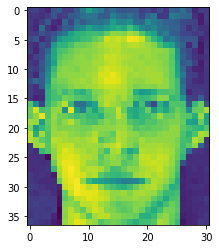

In [92]:
# def scale(img, mult):
# #     res = resize(img, (w_count, h_count)).flatten().astype(int)
    
#     res = rescale(img, 1 / mult, anti_aliasing=False).flatten() * 200
        
#     return res.astype(int)
# def scale2(img, mult):
#     res = rescale(img, 1 / mult, anti_aliasing=False) * 200
#     return res.astype(int)

plt.imshow(imgs[0][0])
a = scale(imgs[0][0], 3)
a = a.reshape((37,31))
plt.imshow(a)
# print(type(a))
print(a.shape)
#print(len(a[0]))
 #print(a)


In [93]:
# plt.imshow(a)

In [94]:

# plt.imshow(np.transpose(np.reshape(imgs_scaled[0][0], (-1,4))))

400
[66 67 66 ... 60 57 57]
1147


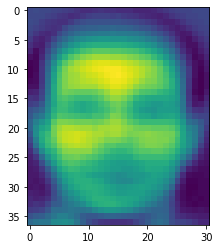

In [321]:
import copy
imgs_pca = copy.deepcopy(imgs_scaled)

mid = np.zeros(len(imgs_pca[0][0]))
c = 0
for i in imgs_pca:
    for j in i:
        mid += j
        c += 1
        
total = 400
print(c)
mid /= total
mid = mid.astype(int)
plt.imshow(mid.reshape((37,31)))
print(mid)
print(len(mid))

# print(imgs_pca[0][0])

for i in range(class_count):
    for j in range(image_count):
        imgs_pca[i][j] = imgs_pca[i][j] - mid
        

In [346]:
#m_imgs = np.zeros((99,400))
m_imgs = np.zeros((400, len(mid)))

count = 0
for i in range(class_count):
    for j in range(image_count):
        m_imgs[count] = imgs_pca[i][j]
        count += 1
# m_imgs = m_imgs.transpose()
len(m_imgs[1])

print(len(m_imgs))

400


In [326]:
cov = np.cov(m_imgs)

In [327]:
np.dot([1, 2, 4], [2, 3, 5])
a = np.array([[1,2,3,4],[5,6,7,8]])
print(a[:,2])

[3 7]


In [330]:
cov = np.cov(m_imgs)
print(len(cov[0]))
vecs, vecs2 = np.linalg.eig(cov)
count = 1000
# res = np.dot(vecs2[0:count], m_imgs).transpose()
# res = np.dot(vecs2[0:count], m_imgs)
# res = np.dot(vecs2[:][0:count], m_imgs).transpose()
res = vecs2.T.dot(m_imgs.T).T
# print(len(res[count]))
pic = (dot(res,vecs2[:][0:count]))[0] + mid


pic = pic.astype(int)
pic = pic.reshape((37,31))
# plt.imshow(pic)
# plt.imshow((imgs_pca[0][0]+mid).reshape((37,31)))
plt.imshow(np.concatenate((pic, (imgs_pca[0][0]+mid).reshape((37,31)).astype(int)), axis = 1))

1147


ValueError: shapes (1147,1147) and (400,1147) not aligned: 1147 (dim 1) != 400 (dim 0)

In [319]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)
print(P)

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]
[[-2.82842712  0.          2.82842712]
 [ 0.          0.          0.        ]]


1147
(1147, 400)
1147
(1147, 1147)
100
<class 'numpy.float64'>
[43.69677551 43.40394806 45.75943079 ... -1.62722601 24.93686859
 19.04247671]


<ipython-input-340-c9c7802bba32>:58: ComplexWarning: Casting complex values to real discards the imaginary part
  pic += (res[i]* v[i]).astype(float)


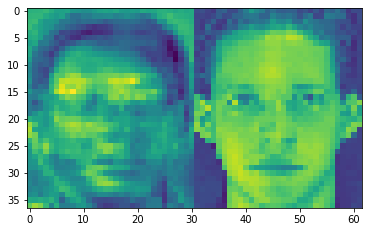

In [340]:
cov = np.cov(m_imgs)
print(len(cov[0]))
vecs, vecs2 = np.linalg.eig(cov)
count = 100
v = vecs2.transpose()
# v = vecs2
# v = -vecs2[0:,count]
# res = np.dot(v, m_imgs)
m_imgs2 = m_imgs.transpose()
print(m_imgs.shape)
print(len(m_imgs2[0]))
print(v.shape)
# print(len(i))
# print(len(m_imgs2[0]))
res = []
for i in range(count):
#     a = vecs2[i]
#     a =  (v[i]) / np.linalg.norm(v[i])
#     a =  (-v[i]) / np.linalg.norm(v[i])
#     print(a)
#     b = m_imgs2[0][i] / np.linalg.norm(m_imgs2[0][i])
#     b = m_imgs2[0] / np.linalg.norm(m_imgs2[0])
#     print(a.shape, b.shape)
#     val = np.dot(a,b)**(0.5)
#     val = np.dot(a,b)
#     print
#     print(val)
    res.append(np.absolute(np.dot(v[i], m_imgs2[0])))
#res = np.dot(-vecs2[0:count], m_imgs)
#len(res[0])
# res = res.transpose()

def absn(vec):
    res = []
    for i in vec:
        res.append(np.absolute(i).astype(float))
    return np.array(res)

# print(vecs)
print(len(res))
# print(res[0])
# res = res.tran
# print(res[0][0:count])
pic = np.zeros(len(vecs))
print(type(pic[0]))
summm = vecs[0:count].sum()
# print(res)
for i in range(count):
#     print(int(res[0][i]))
    a1 = np.linalg.norm(res)
#     pic += (res[i]* vecs2[i]).astype(float)* 400*(vecs[i]/summm).astype(float)
#     pic += (res[0][i]* vecs2[i]).astype(float) *(vecs[i]).astype(float)
#     print(res[0][i]* vecs2[i])
#     pic += (res[0][i]* vecs2[i]).astype(float)
#     pic += (res[0][i]* vecs2[i]).absolute()
#     pic += absn(res[i]* v[i])
#     pic += absn(res[i]* v[i])
    pic += (res[i]* v[i]).astype(float)
#     pic += absn(res[i]* v[i]) * ((vecs[i]).astype(float)**(0.5))
#     pic += absn(res[i]* v[i]) * ((vecs[i]).astype(float))
#     pic += absn(res[0][i]* (-vecs2[i]))
#     pic += (res[0][i]* vecs2[i]).astype(float)* 0.5*(vecs[i]/vecs[0]).astype(float)
print(pic) 
pic = pic.astype(int) + mid
# pic = pic.astype(int)
pic = pic.reshape((37,31))
# plt.imshow(pic)
# plt.imshow((imgs_pca[0][0]+mid).reshape((37,31)))
plt.imshow(np.concatenate((pic, (imgs_pca[0][0]+mid).reshape((37,31)).astype(int)), axis = 1))

400 1147
400 1147


<ipython-input-366-0c2f3badfed6>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  pic += (vectors.T[i] * P[0][i]).astype(float)


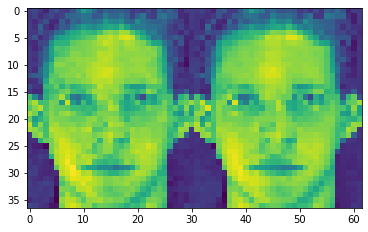

In [366]:
# calculate covariance matrix of centered matrix
print(len(m_imgs), len(m_imgs[0]))
V = np.cov(m_imgs.transpose())
# print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
# print(vectors)
# print(values)
# project data
P = vectors.T.dot(m_imgs.T).T
print(len(P), len(P[0]))

count = 300
pic = np.zeros(len(vectors))
for i in range(count):
    pic += (vectors.T[i] * P[0][i]).astype(float)

pic += mid
pic = pic.reshape((37,31))
plt.imshow(np.concatenate((pic, (imgs_pca[0][0]+mid).reshape((37,31)).astype(int)), axis = 1))
# print(P.T)

1147
[ 1.93605710e+05+0.j  1.40930282e+05+0.j  7.47786266e+04+0.j ...
  2.46241093e-13+0.j  1.04325689e-13+0.j -7.02153709e-14+0.j]
10
<class 'numpy.float64'>
[-9.59088756 41.71169894 69.57264935 ...  6.74353708 -0.07877785
 -7.76214028]


<ipython-input-245-36e8c27a32a8>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  pic += (res[0][i]* vecs2[i]).astype(float)* 400*(vecs[i]/summm).astype(float)


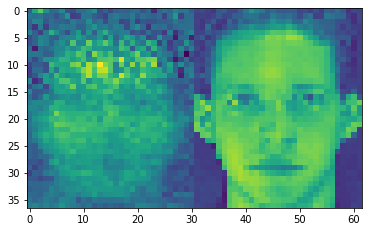

In [245]:
cov = np.cov(m_imgs)
print(len(cov[0]))
vecs, vecs2 = np.linalg.eig(cov)
count = 10
# v = -vecs2[0:,count]
# res = np.dot(v, m_imgs)
res = np.dot(-vecs2[0:count], m_imgs)
#len(res[0])
res = res.transpose()

def absn(vec):
    res = []
    for i in vec:
        res.append(np.absolute(i).astype(float))
    return np.array(res)

print(vecs)
print(len(res[0]))
# print(res[0])
# res = res.tran
# print(res[0][0:count])
pic = np.zeros(len(vecs))
print(type(pic[0]))
summm = vecs[0:count].sum()
for i in range(len(res[0])):
#     print(int(res[0][i]))
#     a1 = np.linalg.norm(res)

    pic += (res[0][i]* vecs2[i]).astype(float)* 400*(vecs[i]/summm).astype(float)
#     pic += (res[0][i]* vecs2[i]).astype(float) *(vecs[i]).astype(float)
#     print(res[0][i]* vecs2[i])
#     pic += (res[0][i]* vecs2[i]).astype(float)
#     pic += (res[0][i]* vecs2[i]).absolute()
#     pic += absn(res[0][i]* vecs2[i]) * 20*(vecs[i]/vecs[0]).astype(float)
#     pic += absn(res[0][i]* (-vecs2[i]))
#     pic += (res[0][i]* vecs2[i]).astype(float)* 0.5*(vecs[i]/vecs[0]).astype(float)
print(pic) 
pic = pic.astype(int) + mid
pic = pic.reshape((37,31))
# plt.imshow(pic)
# plt.imshow((imgs_pca[0][0]+mid).reshape((37,31)))
plt.imshow(np.concatenate((pic, (imgs_pca[0][0]+mid).reshape((37,31)).astype(int)), axis = 1))

1147
[63.66583343 66.41391003 64.30832996 ... 40.30262533 64.95157949
 60.10249929]


<ipython-input-162-34d21cf3b3cf>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  picRestored = (dot(res[n],v)*15 + mid).astype(float)


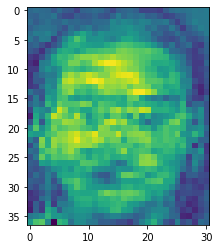

In [162]:
cov = np.cov(m_imgs)
print(len(cov[0]))
vecs, vecs2 = np.linalg.eig(cov)
count = 100
v = -vecs2[0:,count]
res = np.dot(v, m_imgs)
#len(res[0])
# res = res.transpose()

n = 0
picRestored = (dot(res[n],v)*15 + mid).astype(float)
print(picRestored)
picRestored = picRestored.reshape((37,31)).astype(int)
plt.imshow(picRestored)

# print(len(res[0]))
# print(res[0][0:count])
# pic = np.zeros(len(vecs))
# print(type(pic[0]))
# summm = vecs[0:count].sum()
# for i in range(len(res[0])):
# #     print(int(res[0][i]))
# #     pic += (res[0][i]* vecs2[i]).astype(float)* 0.5*(vecs[i]/summm).astype(float)
#     pic += (res[0][i]* vecs2[i]).astype(float)* 5 *(vecs[i]/summm).astype(float)
# #     pic += (res[0][i]* vecs2[i]).astype(float)
# #     pic += (res[0][i]* vecs2[i]).astype(float)* 0.5*(vecs[i]/vecs[0]).astype(float)
# print(pic) 
# pic = pic.astype(int) + mid
# pic = pic.reshape((37,31))
# plt.imshow(pic)
# # plt.imshow((imgs_pca[0][0]+mid).reshape((37,31)))

In [50]:
print(vecs2[630])

[ 5.85125707e-03+0.00000000e+00j  4.17470996e-02+0.00000000e+00j
 -3.68798592e-02+0.00000000e+00j -7.69755869e-03+0.00000000e+00j
 -5.31037590e-02+0.00000000e+00j -3.62799212e-02+0.00000000e+00j
 -2.36987964e-02+0.00000000e+00j  1.04316514e-02+0.00000000e+00j
 -6.62556218e-02+0.00000000e+00j -6.20382184e-02+0.00000000e+00j
 -2.79197155e-02+0.00000000e+00j  3.25340085e-02+0.00000000e+00j
 -5.18242442e-02+0.00000000e+00j -2.31396803e-02+0.00000000e+00j
  1.21826288e-02+0.00000000e+00j -2.01890304e-02+0.00000000e+00j
  1.60311522e-02+0.00000000e+00j -9.69414451e-03+0.00000000e+00j
  1.16560487e-02+0.00000000e+00j  5.67538892e-02+0.00000000e+00j
 -1.45026159e-02+0.00000000e+00j  7.06614179e-05+0.00000000e+00j
  9.42162937e-03+0.00000000e+00j -2.13742757e-02+0.00000000e+00j
 -4.65363178e-02+0.00000000e+00j  2.04844082e-02+0.00000000e+00j
  4.45791599e-02+0.00000000e+00j  2.40679049e-02+0.00000000e+00j
 -7.52620762e-03+0.00000000e+00j  2.98994638e-02+0.00000000e+00j
  1.18921943e-02+0.000000

In [ ]:
vecs, vecs2 = np.linalg.eig(cov)
#print(vecs, vecs2)
print(len(vecs2[0]))
count = 20
res = np.dot(vecs2[0:count], m_imgs)
len(res[0])
res = res.transpose()
imgs_pca = []

count = 0
for i in range(class_count):
    imgs_pca.append([])
#     print(count)
    for j in range(image_count):
        #m_imgs[count] = imgs_pca[i][j]
        #imgs_pca[i][j] = res[count]
        
        imgs_pca[i].append(res[count])
        count += 1
#Xnew = dot(v,Xcentered)
#print Xnew


In [328]:
vecs, vecs2 = np.linalg.eig(cov)
    
for size in range(10,len(vecs2),len(vecs2) // 10):
    #print(vecs, vecs2)
    #print(len(vecs2[0]))
    count = i*10 + 5
    print(size)
#     res = np.dot(vecs2[0:size], m_imgs)
    res = vecs2[0:size].T.dot(m_imgs.T)
    #len(res[0])
    res = res.transpose()
    imgs_pca = []
    
    count = 0
    for i in range(class_count):
        imgs_pca.append([])
    #     print(count)
        for j in range(image_count):
            #m_imgs[count] = imgs_pca[i][j]
            #imgs_pca[i][j] = res[count]
            
            imgs_pca[i].append(res[count])
            count += 1
            
    count_to_load = 7
    test, train = test_train(imgs_pca, count_to_load)
    (fr(test, train))
    #Xnew = dot(v,Xcentered)
    #print Xnew

10


ValueError: shapes (400,10) and (400,1147) not aligned: 10 (dim 1) != 400 (dim 0)

In [36]:
for count_val in range(10):
    res = np.dot(vecs2[0:count_val*5 +10], m_imgs)
    res = res.transpose()
    imgs_pca = []
    count = 0
    for i in range(class_count):
        imgs_pca.append([])
        for j in range(image_count):
            imgs_pca[i].append(res[count])
            count += 1
    count_to_load = 2
    test, train = test_train(imgs_pca, count_to_load)
    (fr(test, train))

0.4
0.45625
0.45
0.45625
0.471875
0.4625
0.453125
0.453125
0.43125
0.45625


In [31]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_pca, count_to_load)
    result[i-1][1] = (fr(test, train))

0.3555555555555555
0.45
0.4892857142857143
0.5125
0.505
0.58125
0.5916666666666667
0.625
0.675


In [40]:
print(len(vecs2[0]))

270


In [ ]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_random, count_to_load)
    result[i-1][1] = (fr(test, train))

In [85]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_fft, count_to_load)
    result[i-1][2] = (fr(test, train))

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


0.6555555555555556
0.78125
0.8178571428571428
0.8708333333333333
0.8800000000000001
0.94375
0.95
0.9125
0.925


In [89]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_hist, count_to_load)
    result[i-1][3] = (fr(test, train))

0.6083333333333333
0.68125
0.6928571428571428
0.7916666666666667
0.905
0.98125
0.9833333333333334
0.975
1.0


In [90]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_grad, count_to_load)
    result[i-1][4] = (fr(test, train))

0.6305555555555555
0.690625
0.7107142857142856
0.7375
0.78
0.85625
0.8833333333333334
0.875
0.825


In [83]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_cos, count_to_load)
    result[i-1][5] = (fr(test, train))

0.725
0.81875
0.85
0.8875
0.9
0.96875
0.9666666666666666
0.975
0.975


In [100]:
graph_data = [[]]
picture_data = [[],[],[],[],[],[],[]]

In [101]:
# res = result[0][0]
for c in range(1,test_count):
    res = result[c-1]
# print(res)
    voted = vote(res, class_count)
    right = []
    count_to_load = c
    for i in range(40):
        for j in range(10-count_to_load):
            right.append(i)
#     print(right)
    ans = 0
    t = voted
    res = 0
    for i in range(len(t)):
        if (t[i] == right[i]):
            ans += 1
    print(ans/len(t))
    graph_data[0].append(ans/len(t))
    if (c == 6):
        picture_data[0]=voted
#         print(1)
#     print(len(t))

0.7416666666666667
0.853125
0.8857142857142857
0.9333333333333333
0.96
0.99375
0.9916666666666667
0.9875
0.975


In [102]:
# graph_data = []

In [103]:

for method_num in range(6):
    graph_data.append([])    
    for c in range(1,test_count):
        res = [result[c-1][method_num]]
# print(res)
        voted = vote(res, class_count)
        right = []
        count_to_load = c
        for i in range(40):
            for j in range(10-count_to_load):
                right.append(i)
#     print(right)
        ans = 0
        t = voted
        res = 0
        for i in range(len(t)):
            if (t[i] == right[i]):
                ans += 1
        print(method_num, c, ans/len(t))
        graph_data[method_num+1].append(ans/len(t))
        
        if (c == 6):
            picture_data[method_num+1]=voted

0 1 0.6305555555555555
0 2 0.740625
0 3 0.7714285714285715
0 4 0.825
0 5 0.9
0 6 0.96875
0 7 0.9583333333333334
0 8 0.975
0 9 0.95
1 1 0.7388888888888889
1 2 0.840625
1 3 0.8607142857142858
1 4 0.9125
1 5 0.94
1 6 0.975
1 7 0.975
1 8 0.975
1 9 0.95
2 1 0.6555555555555556
2 2 0.78125
2 3 0.8178571428571428
2 4 0.8708333333333333
2 5 0.88
2 6 0.94375
2 7 0.95
2 8 0.9125
2 9 0.925
3 1 0.6083333333333333
3 2 0.68125
3 3 0.6928571428571428
3 4 0.7916666666666666
3 5 0.905
3 6 0.98125
3 7 0.9833333333333333
3 8 0.975
3 9 1.0
4 1 0.6305555555555555
4 2 0.690625
4 3 0.7107142857142857
4 4 0.7375
4 5 0.78
4 6 0.85625
4 7 0.8833333333333333
4 8 0.875
4 9 0.825
5 1 0.725
5 2 0.81875
5 3 0.85
5 4 0.8875
5 5 0.9
5 6 0.96875
5 7 0.9666666666666667
5 8 0.975
5 9 0.975


In [104]:
graph_data


[[0.7416666666666667,
  0.853125,
  0.8857142857142857,
  0.9333333333333333,
  0.96,
  0.99375,
  0.9916666666666667,
  0.9875,
  0.975],
 [0.6305555555555555,
  0.740625,
  0.7714285714285715,
  0.825,
  0.9,
  0.96875,
  0.9583333333333334,
  0.975,
  0.95],
 [0.7388888888888889,
  0.840625,
  0.8607142857142858,
  0.9125,
  0.94,
  0.975,
  0.975,
  0.975,
  0.95],
 [0.6555555555555556,
  0.78125,
  0.8178571428571428,
  0.8708333333333333,
  0.88,
  0.94375,
  0.95,
  0.9125,
  0.925],
 [0.6083333333333333,
  0.68125,
  0.6928571428571428,
  0.7916666666666666,
  0.905,
  0.98125,
  0.9833333333333333,
  0.975,
  1.0],
 [0.6305555555555555,
  0.690625,
  0.7107142857142857,
  0.7375,
  0.78,
  0.85625,
  0.8833333333333333,
  0.875,
  0.825],
 [0.725,
  0.81875,
  0.85,
  0.8875,
  0.9,
  0.96875,
  0.9666666666666667,
  0.975,
  0.975]]

In [105]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 200

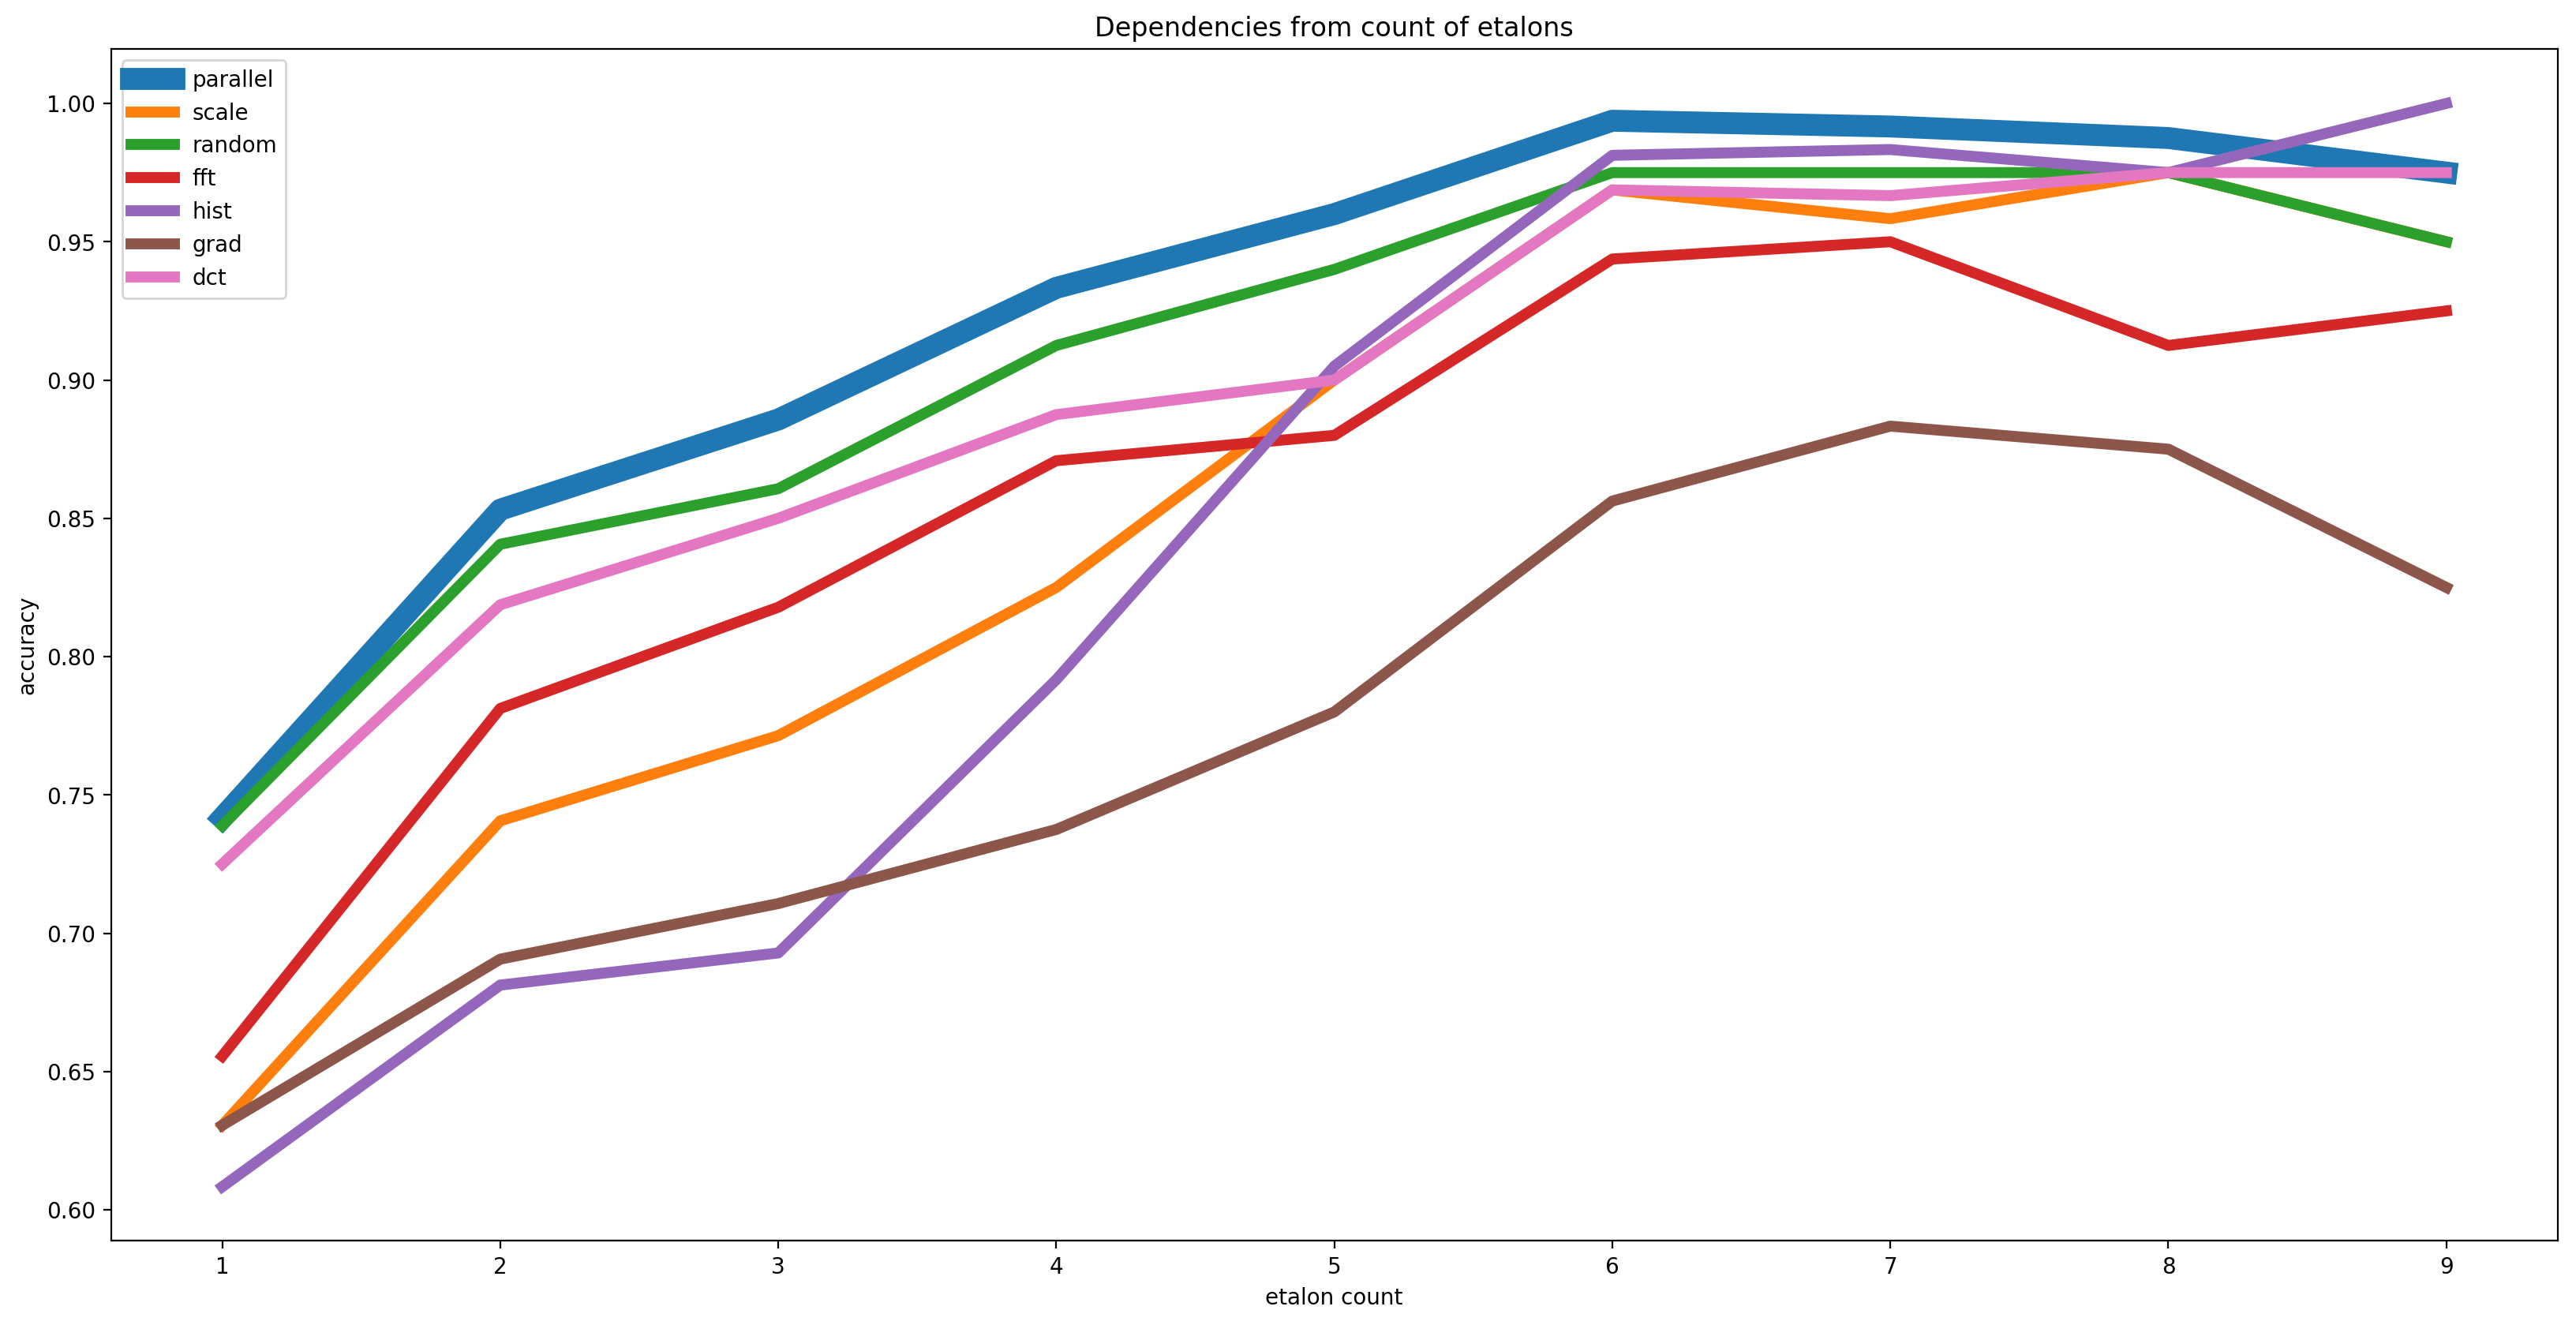

In [108]:
x = [1,2,3,4,5,6,7,8,9]
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(x,graph_data[0], label = "parallel", linewidth=10.0)
plt.plot(x,graph_data[1], label = "scale", linewidth=5.0)
plt.plot(x,graph_data[2], label = "random", linewidth=5.0)
plt.plot(x,graph_data[3], label = "fft", linewidth=5.0)
plt.plot(x,graph_data[4], label = "hist", linewidth=5.0)
plt.plot(x,graph_data[5], label = "grad", linewidth=5.0)
plt.plot(x,graph_data[6], label = "dct", linewidth=5.0)

plt.legend()   # легенда

In [339]:
picture_data = [[],[],[],[],[],[]]
for i in range(0,40):
    for j in range(6,10):
        picture_data[5].append([i,j])
count_to_load = 6

In [340]:
test, train = test_train(imgs_scaled, count_to_load)
picture_data[0] = (fr_pic(test, train))

test, train = test_train(imgs_random, count_to_load)
picture_data[1] = (fr_pic(test, train))
    
test, train = test_train(imgs_fft, count_to_load)
picture_data[2] = (fr_pic(test, train))
    
test, train = test_train(imgs_hist, count_to_load)
picture_data[3] = (fr_pic(test, train))
    
test, train = test_train(imgs_grad, count_to_load)
picture_data[4] = (fr_pic(test, train))
    

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [337]:
num = 0
print(picture_data[5][3])

[0, 9]


0 41
1 41
2 41
3 41
4 41
5 41


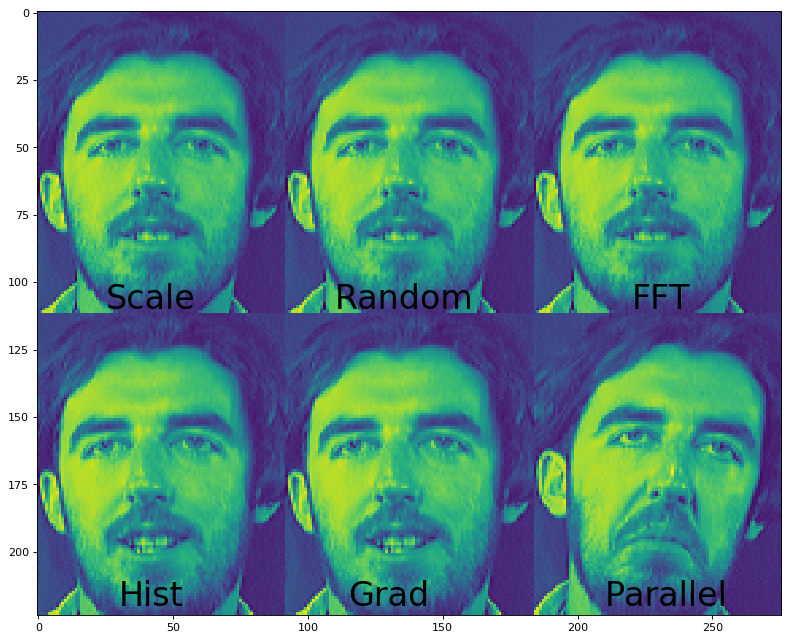

In [380]:

rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 80
num += 1

def get(a, b):
    print(a,b)
    return imgs[picture_data[a][b][0]][picture_data[a][b][1]]

hor1 = np.concatenate((get(0,num), get(1,num), get(2,num)), axis=1)
hor2 = np.concatenate((get(3,num), get(4,num), get(5,num)), axis=1)
text(25, 110, "Scale", fontsize=30)
text(110, 110, "Random", fontsize=30)
text(220, 110, "FFT", fontsize=30)
text(30, 220, "Hist", fontsize=30)
text(115, 220, "Grad", fontsize=30)
text(210, 220, "Parallel", fontsize=30)
final = np.concatenate((hor1, hor2), axis=0)
plt.imshow(final)

address = "res/num"+str(num)+".jpg"
mpimg.imsave(address, final)
# b = np.concatenate((b, b), axis=1)
# b = np.concatenate((b, b), axis=1)